# Aruco

[Aruco](https://www.uco.es/investiga/grupos/ava/portfolio/aruco/) es un módulo de OpenCV que implementa el reconocimiento de marcadores sintéticos con el que poder hacer aplicaciones de Realidad Aumentada. Su nombre proviene de **A**ugmented **R**eality **U**niversity of **Có**rdoba

En primer lugar, para poder hacer el tracking con el que anclar el mundo virtual al mundo real necesitamos un conjunto de marcadores. Dichos marcadores deben ser fáciles de detectar e identificar para que la aplicación sea lo más estable y fluida posible. Además, para que no haya duda sobre la orientación con que es detectado un marcador, es imprescindible que éste no tenga ningún eje de simetría.

Aruco permite definir marcadores personalizados aunque dispone de abundantes marcadores sintéticos preconfigurados y agrupados según sus características en lo que Aruco denomina [**diccionarios**](https://docs.opencv.org/4.x/d5/d0b/classcv_1_1aruco_1_1Dictionary.html#details). Cada diccionario asigna un número entero a cada marcador.

Trabajaremos con los diccionarios clásicos de aruco, formados por patrones de cuadros blancos y negros dispuestos en una matriz de 4x4, 5x5, 6x6 o 7x7 y rodeados por un contorno de cuadros negros.

Por ejemplo, el marcador 0 del diccionario 5x5 es el que se muestra a continuación.

![Marcador 0 del diccionario 5x5](media/5x5_1000-0.svg "Marcador 0 del diccionario 5x5")

Para reducir la tasa de errores, es decir, la detección errónea de un marcador que lleva a confundirlo con otro distinto, necesitamos maximizar la *distancia* que existe entre los marcadores del diccionario. Entendemos por distancia como el número de cuadros en que difieren entre sí dos marcadores.

Cuantos más marcadores haya en un diccionario menor será la distancia entre ellos por lo que interesa usar un diccionario con el menor número de marcadores para así maximizar la distancia entre ellos y reducir la tasa de errores. Para satisfacer las necesidades de la aplicación, para cada tamaño de marcador Aruco define 4 tamaños de diccionario con 50, 100, 250 y 1000 marcadores. Nos referiremos a cada diccionario mediante un identificador que incluye el tamaño de matriz y el número de marcadores, como por ejemplo cv2.aruco.DICT_5x5_100

Además, cada diccionario se construye agregando marcadores al los ya existentes en un diccionario de menor tamaño. Es decir, los 50 marcadores del diccionario cv2.aruco.DICT_5x5_50 son los primeros 50 marcadores de todos los diccionarios de mayor tamaño (cv2.aruco.DICT_5x5_100, cv2.aruco.DICT_5x5_250 y cv2.aruco.DICT_5x5_1000). Del mismo modo, los 250 marcadores del diccionario cv2.aruco.DICT_5x5_250 son los primeros 250 del diccionario cv2.aruco.DICT_5x5_1000.

Para obtener uno de los diccionarios preconfigurados de aruco usamos [getPredefinedDictionary](https://docs.opencv.org/4.x/de/d67/group__objdetect__aruco.html#ga68e0379bcf3799b1ff7145769f8a09c8)

In [1]:
import cv2
import cuia

In [2]:
diccionario = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

Podemos obtener la imagen de cada marcador mediante [generateImageMarker](https://docs.opencv.org/4.x/de/d67/group__objdetect__aruco.html#ga631cb40c63945cc5b9ef6b064a5f4fc2) indicando el diccionario, el número de marcador y el tamaño del marcador en píxeles. No obstante podemos recurrir al generador de marcadores [ArUco markers generator!](https://chev.me/arucogen/) donde fácilmente podremos guardar o imprimir cualquier marcador con el tamaño deseado.

Una vez seleccionado un diccionario, para la detección de marcadores debemos crear un objeto detector mediante [ArucoDetector](https://docs.opencv.org/4.x/d2/d1a/classcv_1_1aruco_1_1ArucoDetector.html) indicando el diccionario seleccionado.

In [3]:
detector = cv2.aruco.ArucoDetector(diccionario)

La detección de marcadores en una imagen se realiza mediante una llamada al método [detectMarkers](https://docs.opencv.org/4.x/d2/d1a/classcv_1_1aruco_1_1ArucoDetector.html#a0c1d14251bf1cbb06277f49cfe1c9b61) del detector.

![3 Marcadores](media/3marcadores.jpg "3 Marcadores")

In [4]:
imagen = cv2.imread("media/3marcadores.jpg")
bboxs, ids, rechazados = detector.detectMarkers(imagen)

Los valores devueltos por detectMarkers son:
* Una lista de contornos de los marcadores detectados. Cada contorno está especificado mediante una lista de los 4 vértices que lo definen empezando por el superior izquierdo.
* Una lista con los identificadores (números enteros) de los marcadores detectados
* Una lista con los contornos de candidatos a ser identificados como marcadores pero que fueron finalmente rechazados. Esto será usado solamente con fines de depurado por lo que habitualmente se desechará.

Para poder visualizar las detecciones realizadas podemos emplear [drawDetectedMarkers](https://docs.opencv.org/4.x/de/d67/group__objdetect__aruco.html#ga2ad34b0f277edebb6a132d3069ed2909)

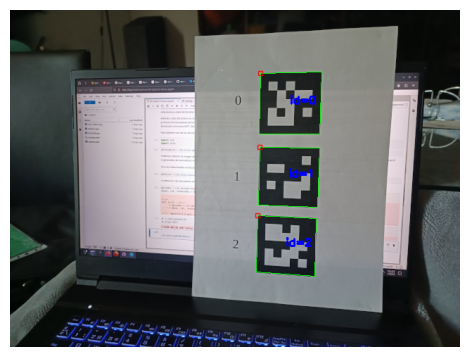

In [5]:
detectados = cv2.aruco.drawDetectedMarkers(imagen, bboxs, ids)
cuia.plot(detectados)

In [8]:
ar = cuia.myVideo(0)
def dibujamarcadores(frame):
    bboxs, ids, _ = detector.detectMarkers(frame)
    frame = cv2.aruco.drawDetectedMarkers(frame, bboxs, ids)
    return(frame)
ar.process = dibujamarcadores
ar.play("AR")

[ WARN:0@19.853] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:0@19.853] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@19.860] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


In [7]:

cv2.destroyAllWindows()